# Market Basket Analysis

- Widely used in Retail sector
- Find products that occur frequently in a basket e.g. bread & butter
- Analyse association among the products
- This helps in:
    - Arranging SKU(Stock keeping unit) display
    - Customizing Promotions
    - Change the design of Catalog
    - Cross-market
- Learning and analyzing the products bought together by the customers is called the Market Basket Analysis.

Association Rules
 - Items do customers frequently buy together
 - Is a rule based approach
 - Generates the relaionship between variables in a dataset
 - {bread} -> butter
 - Apriori
 - Fpgrowth

## Association Rules

Association rule mining finds intresting associations and relationships among large sets of data items. This rule shows how frequently a itemset occurs in a transaction. Based on those rules created from the Dataset, we perform Market Basket Analysis.

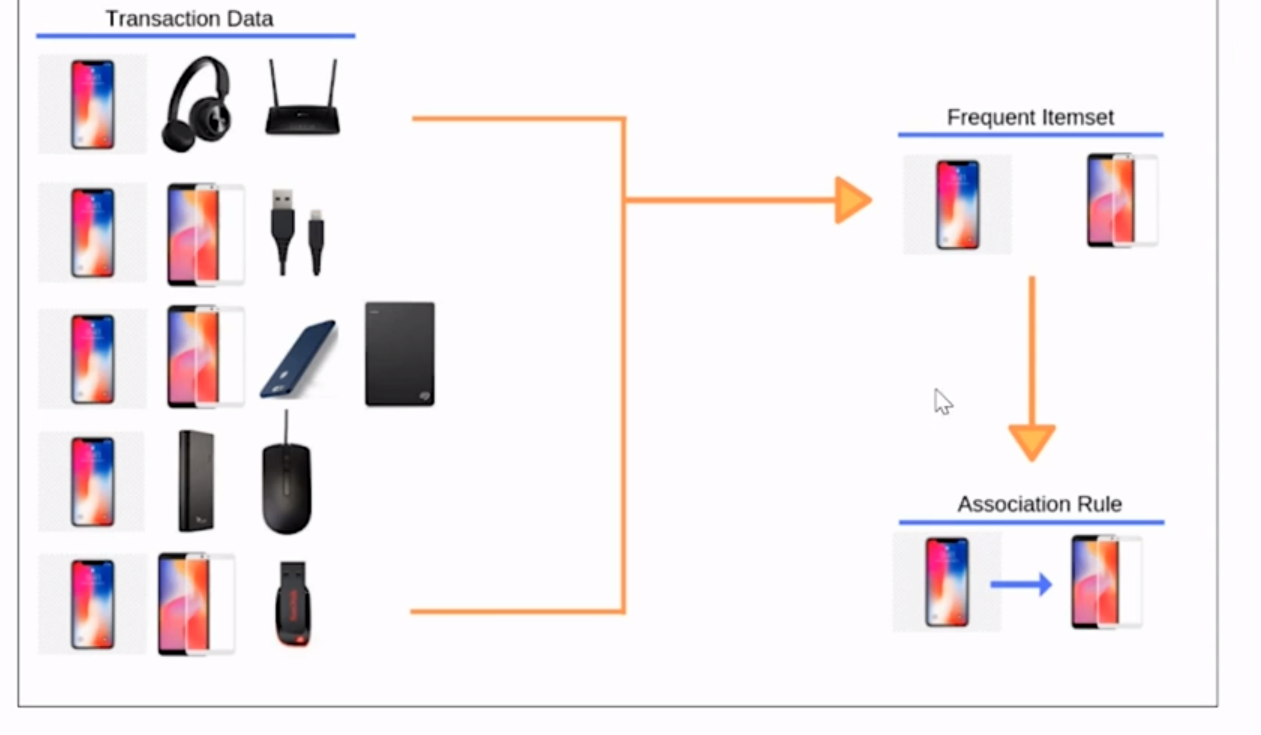

# Market Basket Analysis

#### What is market basket Analysis?

Market Basket analysis one of the key technique used by large retallers to uncover association between items. It works by looking for combinations of items that occur together frequently in transactions. To put it another way, It allows retailers to identify relationships between the items that people buy.

# Market Basket Analysis For Foodmart Store Dataset
About FoodMart

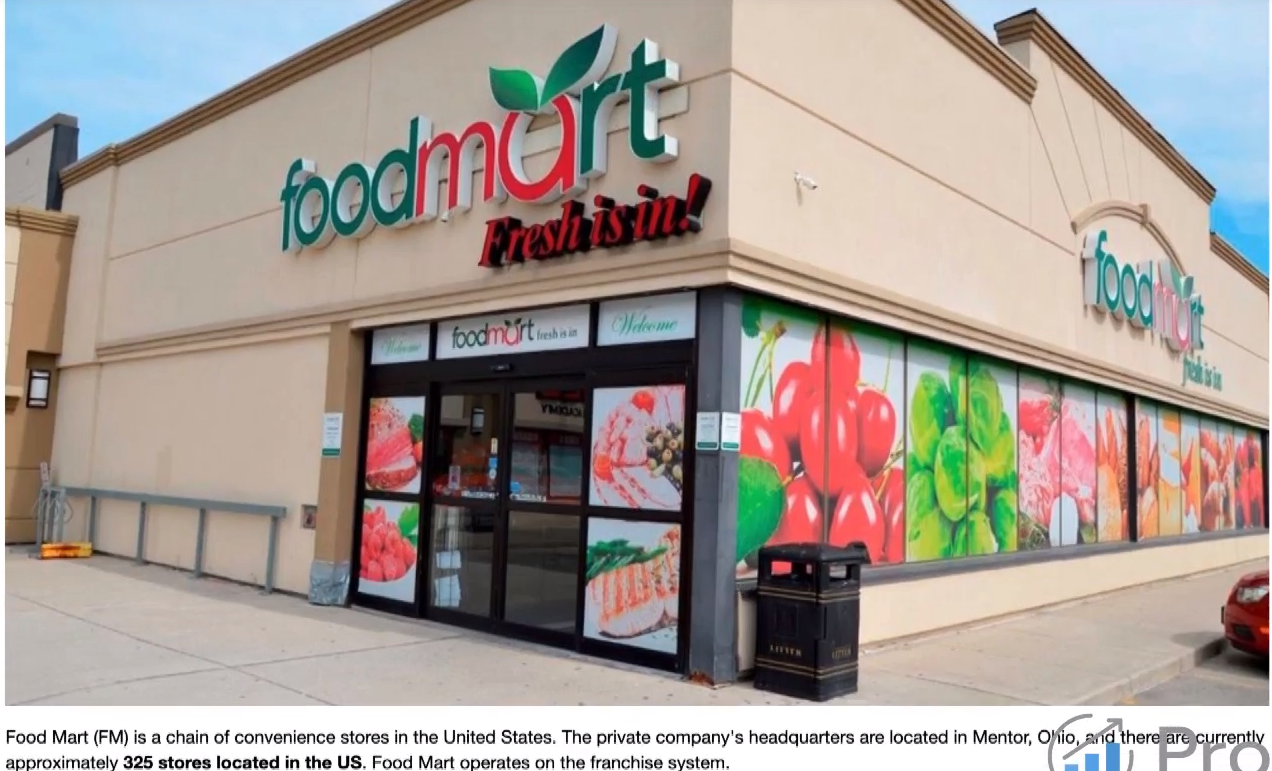

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactiveshell = "all"

## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action = 'ignore', category=DeprecationWarning)

In [3]:
## Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### Loading Customers Datasets

In [9]:
customers = pd.read_csv("data/customer.csv")

In [10]:
customers.head()

,customer_id,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned
0,1,Tlaxiaco,Oaxaca,Mexico,30,$30K - $50K,F,4,2,Partial High School,10/09/91,Bronze,Skilled Manual,Y,4
1,2,Sooke,BC,Canada,101,$70K - $90K,M,1,0,Partial High School,11/03/93,Bronze,Professional,N,3
2,3,Issaquah,WA,USA,21,$50K - $70K,F,1,1,Bachelors Degree,11/06/91,Bronze,Professional,Y,2
3,4,Burnaby,BC,Canada,92,$10K - $30K,M,4,4,Partial High School,21/05/94,Normal,Skilled Manual,N,2
4,5,Novato,CA,USA,42,$30K - $50K,F,3,0,Partial College,21/08/92,Silver,Manual,N,3


In [12]:
len(customers)

10281

#### Loading products Datasets

In [14]:
products = pd.read_csv("data/product.csv")

In [15]:
products.head()

,product_class_id,product_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
0,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,0,0,30,14,16.9,12.60,7.40
1,52,2,Washington,Washington Mango Drink,96516502499,0.74,7.42,4.42,0,1,18,8,13.4,3.71,22.60
2,52,3,Washington,Washington Strawberry Drink,58427771925,0.83,13.10,11.10,1,1,17,13,14.4,11.00,7.77
3,19,4,Washington,Washington Cream Soda,64412155747,3.64,10.60,9.60,1,0,26,10,22.9,18.90,7.93
4,19,5,Washington,Washington Diet Soda,85561191439,2.19,6.66,4.65,1,0,7,10,20.7,21.90,19.20


In [16]:
len(products)

1560

#### Loading Deepartments Dataset

In [17]:
product_class = pd.read_csv("data/product_class.csv")

In [18]:
product_class.head()

,product_class_id,subcategory,category,department,family
0,1,Nuts,Specialty,Produce,Food
1,2,Shellfish,Seafood,Seafood,Food
2,3,Canned Fruit,Fruit,Canned Products,Food
3,4,Spices,Baking Goods,Baking Goods,Food
4,5,Pasta,Starchy Foods,Starchy Foods,Food


In [19]:
len(product_class)

108

#### Loading Store Dataset

In [45]:
store = pd.read_csv("data/store.csv")

In [46]:
store.head()

,store_id,store_type,region_id,store_name,store_number,store_street_address,store_city,store_state,store_postal_code,store_country,store_manager,store_phone,store_fax,first_opened_date,last_remodel_date,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
0,0,HeadQuarters,0,HQ,0,1 Alameda Way,Alameda,CA,55555,USA,Sam,178-555-8979,124-555-9116,########,4/12/1990 0:00,25638,18697,3648,3293,0,0,0,0,0
1,1,Supermarket,28,Store 1,1,2853 Bailey Rd,Acapulco,Guerrero,55555,Mexico,Jones,262-555-5124,262-555-5121,9/1/1982 0:00,5/12/1990 0:00,23593,17475,3671,2447,0,0,0,0,0
2,2,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0
3,3,Supermarket,76,Store 3,3,1501 Ramsey Circle,Bremerton,WA,55555,USA,Davis,509-555-1596,509-555-1591,14/6/1959 0:00,19/11/1967 0:00,39696,24390,9184,6122,0,0,1,1,0
4,4,Gourmet Supermarket,27,Store 4,4,433 St George Dr,Camacho,Zacatecas,55555,Mexico,Johnson,304-555-1474,304-555-1471,27/9/1994 0:00,1/12/1995 0:00,23759,16844,4149,2766,1,0,1,1,1


In [47]:
len(store)

25

#### Loading Region Dataset

In [26]:
region = pd.read_csv("data/region.csv")

In [27]:
region.head()

,region_id,sales_city,sales_state_province,sales_district,sales_region,sales_country,sales_district_id
0,0,NaN,NaN,No District,No Region,No Country,0
1,1,San Francisco,CA,San Francisco,Central West,USA,123
2,2,Mexico City,DF,Mexico City,Mexico Central,Mexico,118
3,3,Los Angeles,CA,Los Angeles,South West,USA,116
4,4,Guadalajara,Jalisco,Guadalajara,Mexico West,Mexico,114


In [28]:
len(region)

110

#### Loading Sales Dataset

In [29]:
df = pd.read_csv("data/sales.csv")

In [30]:
df.head()

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales
0,337,371,6280,2,1.50,0.5100,2
1,1512,371,6280,2,1.62,0.6318,3
2,963,371,4018,2,2.40,0.7200,1
3,181,371,4018,2,2.79,1.0323,3
4,1383,371,4018,2,5.18,2.1756,2


In [31]:
len(df)

269720

#### Loading Time by Date Dataset

In [32]:
time_by_day = pd.read_csv("data/time_by_day.csv")

In [33]:
time_by_day.head()

,time_id,the_date,the_day,the_year,the_month,day_of_month,day_since_epoch
0,1,1996-01-01,Monday,1996,1,1,33603
1,2,1996-01-02,Tuesday,1996,1,2,33604
2,3,1996-01-03,Wednesday,1996,1,3,33605
3,4,1996-01-04,Thursday,1996,1,4,33606
4,5,1996-01-05,Friday,1996,1,5,33607


In [34]:
len(time_by_day)

1461

#### merging Customers Datasets in df Dataframe 

In [35]:
df = df.merge(customers,on='customer_id')

In [36]:
df.head()

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned
0,337,371,6280,2,1.50,0.5100,2,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3
1,1512,371,6280,2,1.62,0.6318,3,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3
2,963,371,4018,2,2.40,0.7200,1,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2
3,181,371,4018,2,2.79,1.0323,3,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2
4,1383,371,4018,2,5.18,2.1756,2,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2


In [37]:
len(df)

269720

#### Merging products Datasets in df DataFrame

In [38]:
df = df.merge(products,on='product_id')

In [39]:
df.head()

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
0,337,371,6280,2,1.50,0.5100,2,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.4,21.6,4.76
1,337,987,5713,2,0.75,0.2775,1,Anacortes,WA,USA,79,$70K - $90K,M,3,0,Bachelors Degree,06/08/93,Bronze,Professional,N,1,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.4,21.6,4.76
2,337,826,7413,3,2.25,1.1025,3,Bremerton,WA,USA,76,$10K - $30K,F,3,0,Partial High School,20/12/93,Normal,Manual,Y,1,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.4,21.6,4.76
3,337,765,1005,3,3.00,1.1400,4,Bremerton,WA,USA,76,$10K - $30K,M,2,0,Bachelors Degree,20/01/93,Normal,Management,Y,0,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.4,21.6,4.76
4,337,829,4998,3,2.25,1.1250,3,Port Orchard,WA,USA,77,$50K - $70K,M,3,0,Bachelors Degree,04/06/92,Bronze,Professional,N,3,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.4,21.6,4.76


In [40]:
len(df)

269720

#### Merging Deaprtments Datasets in df DataFrame

In [41]:
df = df.merge(product_class,on='product_class_id')

In [42]:
df.head()

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,subcategory,category,department,family
0,337,371,6280,2,1.50,0.5100,2,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.4,21.6,4.76,Soup,Canned Soup,Canned Foods,Food
1,337,987,5713,2,0.75,0.2775,1,Anacortes,WA,USA,79,$70K - $90K,M,3,0,Bachelors Degree,06/08/93,Bronze,Professional,N,1,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.4,21.6,4.76,Soup,Canned Soup,Canned Foods,Food
2,337,826,7413,3,2.25,1.1025,3,Bremerton,WA,USA,76,$10K - $30K,F,3,0,Partial High School,20/12/93,Normal,Manual,Y,1,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.4,21.6,4.76,Soup,Canned Soup,Canned Foods,Food
3,337,765,1005,3,3.00,1.1400,4,Bremerton,WA,USA,76,$10K - $30K,M,2,0,Bachelors Degree,20/01/93,Normal,Management,Y,0,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.4,21.6,4.76,Soup,Canned Soup,Canned Foods,Food
4,337,829,4998,3,2.25,1.1250,3,Port Orchard,WA,USA,77,$50K - $70K,M,3,0,Bachelors Degree,04/06/92,Bronze,Professional,N,3,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.4,21.6,4.76,Soup,Canned Soup,Canned Foods,Food


In [43]:
len(df)

269720

#### Merging Stores Datasets in df DataFrame

In [48]:
df = df.merge(store,on='store_id')

In [49]:
df.head()

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,subcategory,category,department,family,store_type,region_id,store_name,store_number,store_street_address,store_city,store_state,store_postal_code,store_country,store_manager,store_phone,store_fax,first_opened_date,last_remodel_date,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
0,337,371,6280,2,1.50,0.5100,2,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.40,21.6,4.76,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0
1,337,987,5713,2,0.75,0.2775,1,Anacortes,WA,USA,79,$70K - $90K,M,3,0,Bachelors Degree,06/08/93,Bronze,Professional,N,1,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.40,21.6,4.76,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0
2,337,742,307,2,2.25,0.7425,3,Sedro Woolley,WA,USA,80,$130K - $150K,F,5,0,Bachelors Degree,12/01/93,Bronze,Professional,N,1,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.40,21.6,4.76,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0
3,963,371,4018,2,2.40,0.7200,1,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,58,Just Right,Just Right Chicken Noodle Soup,22934378981,2.40,20.50,18.50,1,1,6,13,6.68,10.6,9.16,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0
4,963,952,5121,2,2.40,1.1040,1,Bellingham,WA,USA,78,$30K - $50K,M,2,0,Partial College,12/04/93,Bronze,Clerical,Y,2,58,Just Right,Just Right Chicken Noodle Soup,22934378981,2.40,20.50,18.50,1,1,6,13,6.68,10.6,9.16,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0


In [50]:
len(df)

269720

#### Merging Region Datasets in df DataFrame

In [51]:
df = df.merge(region,on='region_id')

In [52]:
df.head()

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,subcategory,category,department,family,store_type,region_id,store_name,store_number,store_street_address,store_city,store_state,store_postal_code,store_country,store_manager,store_phone,store_fax,first_opened_date,last_remodel_date,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,sales_city,sales_state_province,sales_district,sales_region,sales_country,sales_district_id
0,337,371,6280,2,1.50,0.5100,2,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.40,21.6,4.76,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111
1,337,987,5713,2,0.75,0.2775,1,Anacortes,WA,USA,79,$70K - $90K,M,3,0,Bachelors Degree,06/08/93,Bronze,Professional,N,1,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.40,21.6,4.76,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111
2,337,742,307,2,2.25,0.7425,3,Sedro Woolley,WA,USA,80,$130K - $150K,F,5,0,Bachelors Degree,12/01/93,Bronze,Professional,N,1,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.40,21.6,4.76,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111
3,963,371,4018,2,2.40,0.7200,1,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,58,Just Right,Just Right Chicken Noodle Soup,22934378981,2.40,20.50,18.50,1,1,6,13,6.68,10.6,9.16,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111
4,963,952,5121,2,2.40,1.1040,1,Bellingham,WA,USA,78,$30K - $50K,M,2,0,Partial College,12/04/93,Bronze,Clerical,Y,2,58,Just Right,Just Right Chicken Noodle Soup,22934378981,2.40,20.50,18.50,1,1,6,13,6.68,10.6,9.16,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111


In [53]:
len(df)

269720

#### Merging Time by Day Dataset in df Dataframe

In [55]:
df = df.merge(time_by_day,on='time_id')

In [56]:
df.head()

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,subcategory,category,department,family,store_type,region_id,store_name,store_number,store_street_address,store_city,store_state,store_postal_code,store_country,store_manager,store_phone,store_fax,first_opened_date,last_remodel_date,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,sales_city,sales_state_province,sales_district,sales_region,sales_country,sales_district_id,the_date,the_day,the_year,the_month,day_of_month,day_since_epoch
0,337,371,6280,2,1.50,0.5100,2,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.40,21.6,4.76,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
1,963,371,4018,2,2.40,0.7200,1,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,58,Just Right,Just Right Chicken Noodle Soup,22934378981,2.40,20.50,18.50,1,1,6,13,6.68,10.6,9.16,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
2,1512,371,6280,2,1.62,0.6318,3,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,5,Jardon,Jardon Spaghetti,53042894005,0.54,13.70,10.60,1,0,28,13,12.80,12.6,9.81,Pasta,Starchy Foods,Starchy Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
3,181,371,4018,2,2.79,1.0323,3,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,61,High Top,High Top Lettuce,79397689700,0.93,16.10,14.10,0,1,23,5,16.10,15.1,14.50,Fresh Vegetables,Vegetables,Produce,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
4,483,371,4382,2,3.88,1.7072,2,Anacortes,WA,USA,79,$130K - $150K,F,0,0,Graduate Degree,25/07/92,Silver,Management,N,2,61,Tell Tale,Tell Tale Corn on the Cob,80806578993,1.94,13.00,10.00,1,0,3,10,20.80,21.6,5.86,Fresh Vegetables,Vegetables,Produce,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973


In [57]:
len(df)

269720

#### Converting Dataframe to Final Foodmart Offline Dataset

In [86]:
#df.to_csv('Foodmart_dataset.csv',index=False)
#!pip install squarify
#!pip install gapminder
#!pip install mlxtend

## Data Exploration

In [4]:
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import squarify
import gapminder as gapminder

%matplotlib inline 

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

#### Describe

In [59]:
df.describe()

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,customer_region_id,total_children,num_children_at_home,num_cars_owned,product_class_id,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,region_id,store_number,store_postal_code,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,sales_district_id,the_year,the_month,day_of_month,day_since_epoch
count,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,2.697200e+05,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.0,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000
mean,783.862873,800.004990,5119.390405,12.753730,6.542142,2.618622,3.090201,57.723454,2.535351,0.816091,2.205632,54.382471,5.563373e+10,2.117859,13.797998,11.786979,0.560911,0.353956,18.897490,9.469887,12.903214,12.938429,12.963582,39.894947,12.753730,55555.0,28975.729082,19957.547653,5450.413325,3567.816298,0.623484,0.295265,0.614471,0.553111,0.594839,120.811319,1997.678048,6.661100,15.109970,34402.004990
std,447.926131,201.955563,2901.883077,6.349746,3.461318,1.452805,0.835554,29.973844,1.490679,1.292423,1.111834,30.846176,2.580783e+10,0.930726,4.623687,4.684530,0.496277,0.478197,10.244825,2.637010,5.759837,5.844580,5.608001,32.813184,6.349746,0.0,5830.618714,4306.565245,1601.140519,1007.121215,0.484513,0.456163,0.486721,0.497172,0.490924,6.222520,0.467226,3.514326,8.319021,201.955563
min,1.000000,367.000000,3.000000,1.000000,0.500000,0.153000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.003103e+10,0.500000,6.000000,3.050000,0.000000,0.000000,1.000000,5.000000,3.010000,3.000000,3.000000,1.000000,1.000000,55555.0,20319.000000,13305.000000,2452.000000,1635.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110.000000,1997.000000,1.000000,1.000000,33969.000000
25%,396.000000,657.000000,2570.000000,7.000000,3.810000,1.498000,3.000000,26.000000,1.000000,0.000000,1.000000,30.000000,3.341941e+10,1.420000,9.670000,7.710000,0.000000,0.000000,10.000000,7.000000,7.860000,7.880000,8.320000,18.000000,7.000000,55555.0,23598.000000,16232.000000,4357.000000,3164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,116.000000,1997.000000,4.000000,8.000000,34259.000000
50%,787.000000,830.000000,5090.000000,13.000000,5.940000,2.386500,3.000000,66.000000,3.000000,0.000000,2.000000,58.000000,5.639667e+10,2.130000,13.600000,11.600000,1.000000,0.000000,19.000000,9.000000,12.900000,12.800000,12.900000,25.000000,13.000000,55555.0,30268.000000,20141.000000,5188.000000,3375.000000,1.000000,0.000000,1.000000,1.000000,1.000000,120.000000,1998.000000,7.000000,15.000000,34432.000000
75%,1174.000000,968.000000,7614.000000,17.000000,8.670000,3.486000,4.000000,85.000000,4.000000,1.000000,3.000000,79.000000,7.797237e+10,2.790000,17.700000,16.000000,1.000000,1.000000,28.000000,12.000000,17.700000,18.200000,17.600000,76.000000,17.000000,55555.0,33858.000000,22271.000000,6954.000000,3755.000000,1.000000,1.000000,1.000000,1.000000,1.000000,125.000000,1998.000000,10.000000,22.000000,34570.000000
max,1559.000000,1095.000000,10281.000000,24.000000,23.640000,10.290000,6.000000,109.000000,5.000000,5.000000,4.000000,110.000000,9.998368e+10,3.980000,21.900000,20.800000,1.000000,1.000000,36.000000,14.000000,22.900000,22.900000,22.900000,106.000000,24.000000,55555.0,39696.000000,30351.000000,9184.000000,6122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,133.000000,1998.000000,12.000000,30.000000,34697.000000


In [60]:
df.describe(include='all')

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,subcategory,category,department,family,store_type,region_id,store_name,store_number,store_street_address,store_city,store_state,store_postal_code,store_country,store_manager,store_phone,store_fax,first_opened_date,last_remodel_date,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,sales_city,sales_state_province,sales_district,sales_region,sales_country,sales_district_id,the_date,the_day,the_year,the_month,day_of_month,day_since_epoch
count,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720,269720,269720,269720.000000,269720,269720,269720.000000,269720.000000,269720,269720,269720,269720,269720,269720.000000,269720.000000,269720,269720,2.697200e+05,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720,269720,269720,269720,269720,269720.000000,269720,269720.000000,269720,269720,269720,269720.0,269720,269720,269720,269720,269720,269720,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720,269720,269720,269720,269720,269720.000000,269720,269720,269720.000000,269720.000000,269720.000000,269720.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107,12,3,NaN,8,2,NaN,NaN,5,1633,4,5,2,NaN,NaN,111,1559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102,45,22,3,5,NaN,24,NaN,24,23,10,NaN,3,22,24,24,24,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,10,21,7,3,NaN,673,7,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hidalgo,WA,USA,NaN,$30K - $50K,F,NaN,NaN,Partial High School,16/10/93,Bronze,Professional,Y,NaN,NaN,Hermanos,Moms Roasted Chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fresh Vegetables,Vegetables,Produce,Food,Supermarket,NaN,Store 13,NaN,5179 Valley Ave,Salem,WA,NaN,USA,Inmon,977-555-2724,977-555-2721,13/4/1957 0:00,10/11/1997 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Salem,WA,Los Angeles,North West,USA,NaN,1998-12-07,Thursday,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16684,86855,180823,NaN,88422,136181,NaN,NaN,81536,954,151261,87867,163137,NaN,NaN,8071,225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20859,32919,38041,193728,118341,NaN,25865,NaN,25865,25865,86855,NaN,180823,25865,25865,25865,25865,25865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25865,86855,31501,130006,180823,NaN,1377,40685,NaN,NaN,NaN,NaN
mean,783.862873,800.004990,5119.390405,12.753730,6.542142,2.618622,3.090201,NaN,NaN,NaN,57.723454,NaN,NaN,2.535351,0.816091,NaN,NaN,NaN,NaN,NaN,2.205632,54.382471,NaN,NaN,5.563373e+10,2.117859,13.797998,11.786979,0.560911,0.353956,18.897490,9.469887,12.903214,12.938429,12.963582,NaN,NaN,NaN,NaN,NaN,39.894947,NaN,12.753730,NaN,NaN,NaN,55555.0,NaN,NaN,NaN,NaN,NaN,NaN,28975.729082,19957.547653,5450.413325,3567.816298,0.623484,0.295265,0.614471,0.553111,0.594839,NaN,NaN,NaN,NaN,NaN,120.811319,NaN,NaN,1997.678048,6.661100,15.109970,34402.004990
std,447.926131,201.955563,2901.883077,6.349746,3.461318,1.452805,0.835554,NaN,NaN,NaN,29.973844,NaN,NaN,1.490679,1.292423,NaN,NaN,NaN,NaN,NaN,1.111834,30.846176,NaN,NaN,2.580783e+10,0.930726,4.623687,4.684530,0.496277,0.478197,10.244825,2.637010,5.759837,5.844580,5.608001,NaN,NaN,NaN,NaN,NaN,32.813184,NaN,6.349746,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,5830.618714,4306.565245,1601.140519,1007.121215,0.484513,0.456163,0.486721,0.497172,0.490924,NaN,NaN,NaN,NaN,NaN,6.222520,NaN,NaN,0.467226,3.514326,8.319021,201.955563
min,1.000000,367.000000,3.000000,1.000000,0.500000,0.153000,1.000000,NaN,NaN,NaN,1.000000,NaN,NaN

#### Missing value

In [61]:
df.isnull().sum()

product_id              0
time_id                 0
customer_id             0
store_id                0
store_sales             0
store_cost              0
unit_sales              0
city                    0
state_province          0
country                 0
customer_region_id      0
yearly_income           0
gender                  0
total_children          0
num_children_at_home    0
education               0
date_accnt_opened       0
member_card             0
occupation              0
houseowner              0
num_cars_owned          0
product_class_id        0
brand_name              0
product_name            0
SKU                     0
SRP                     0
gross_weight            0
net_weight              0
recyclable_package      0
low_fat                 0
units_per_case          0
cases_per_pallet        0
shelf_width             0
shelf_height            0
shelf_depth             0
subcategory             0
category                0
department              0
family      

#### Datatypes

In [62]:
df.dtypes

product_id                int64
time_id                   int64
customer_id               int64
store_id                  int64
store_sales             float64
store_cost              float64
unit_sales                int64
city                     object
state_province           object
country                  object
customer_region_id        int64
yearly_income            object
gender                   object
total_children            int64
num_children_at_home      int64
education                object
date_accnt_opened        object
member_card              object
occupation               object
houseowner               object
num_cars_owned            int64
product_class_id          int64
brand_name               object
product_name             object
SKU                       int64
SRP                     float64
gross_weight            float64
net_weight              float64
recyclable_package        int64
low_fat                   int64
units_per_case            int64
cases_pe

#### checking Datatypes, Missing Value, Unique Value

In [64]:
temp = pd.DataFrame(index=df.columns)
temp['data_type'] = df.dtypes
temp['null_counts'] = df.isnull().sum()
temp['unique_count'] = df.nunique()

In [65]:
temp

,data_type,null_counts,unique_count
product_id,int64,0,1559
time_id,int64,0,673
customer_id,int64,0,8842
store_id,int64,0,24
store_sales,float64,0,1069
store_cost,float64,0,12535
unit_sales,int64,0,6
city,object,0,107
state_province,object,0,12
country,object,0,3


## Univariate Analysis
#### Histograms
#### Frequency Plot Of Department Id

Text(0.5, 0, 'department id')

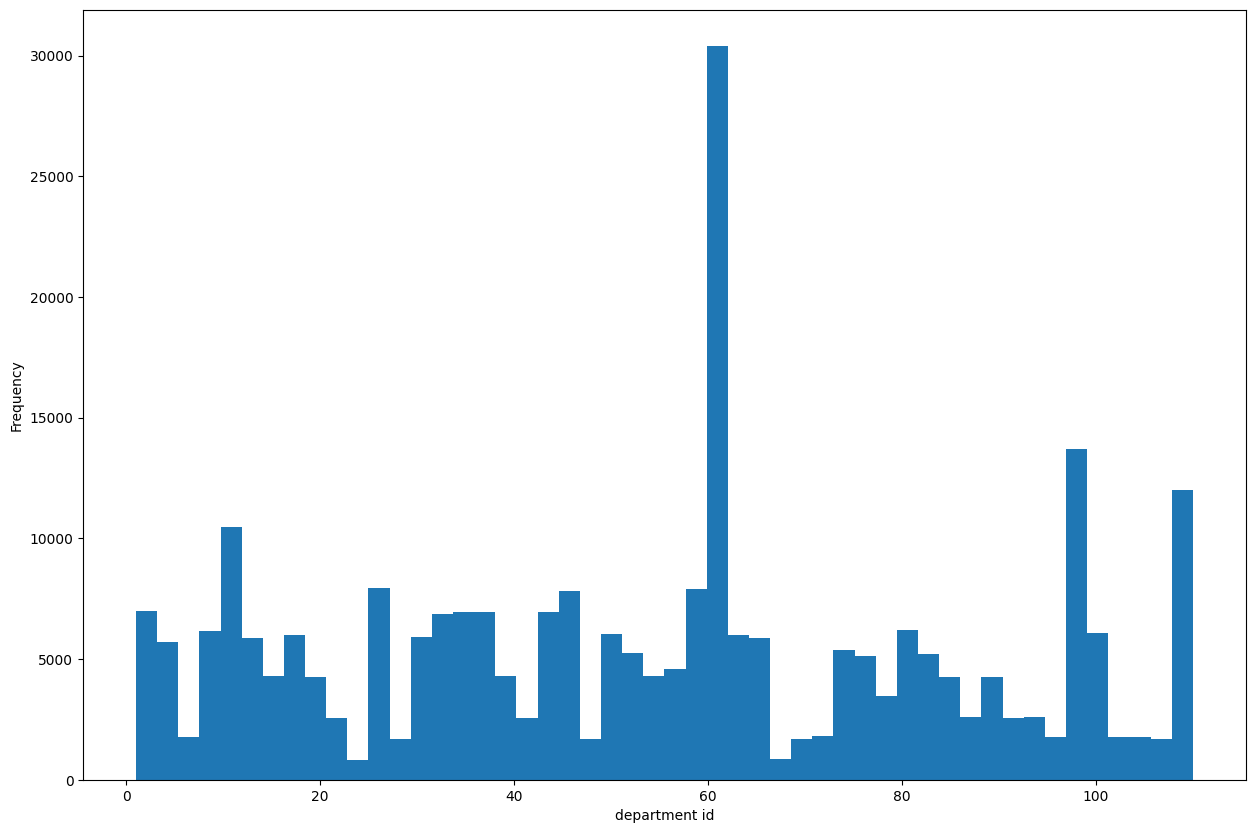

In [68]:
fig = plt.figure(figsize=(15,10))
df['product_class_id'].plot.hist(bins=50)
plt.xlabel('department id')

#### Frequency Plot Of Product Id

Text(0.5, 0, 'product id')

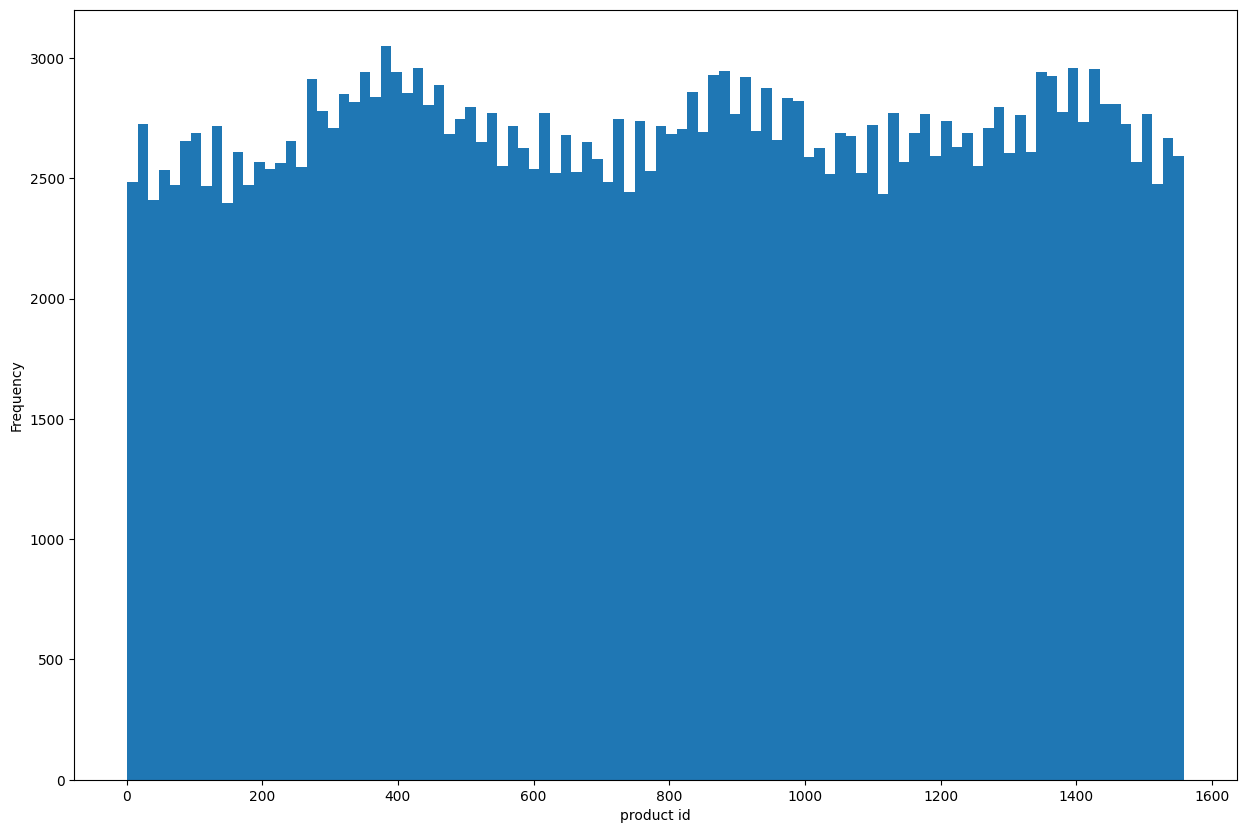

In [69]:
fig = plt.figure(figsize=(15,10))
df['product_id'].plot.hist(bins=100)
plt.xlabel('product id')

#### Frequency Plot Of Unit Sales

Text(0.5, 0, 'Unit Sales')

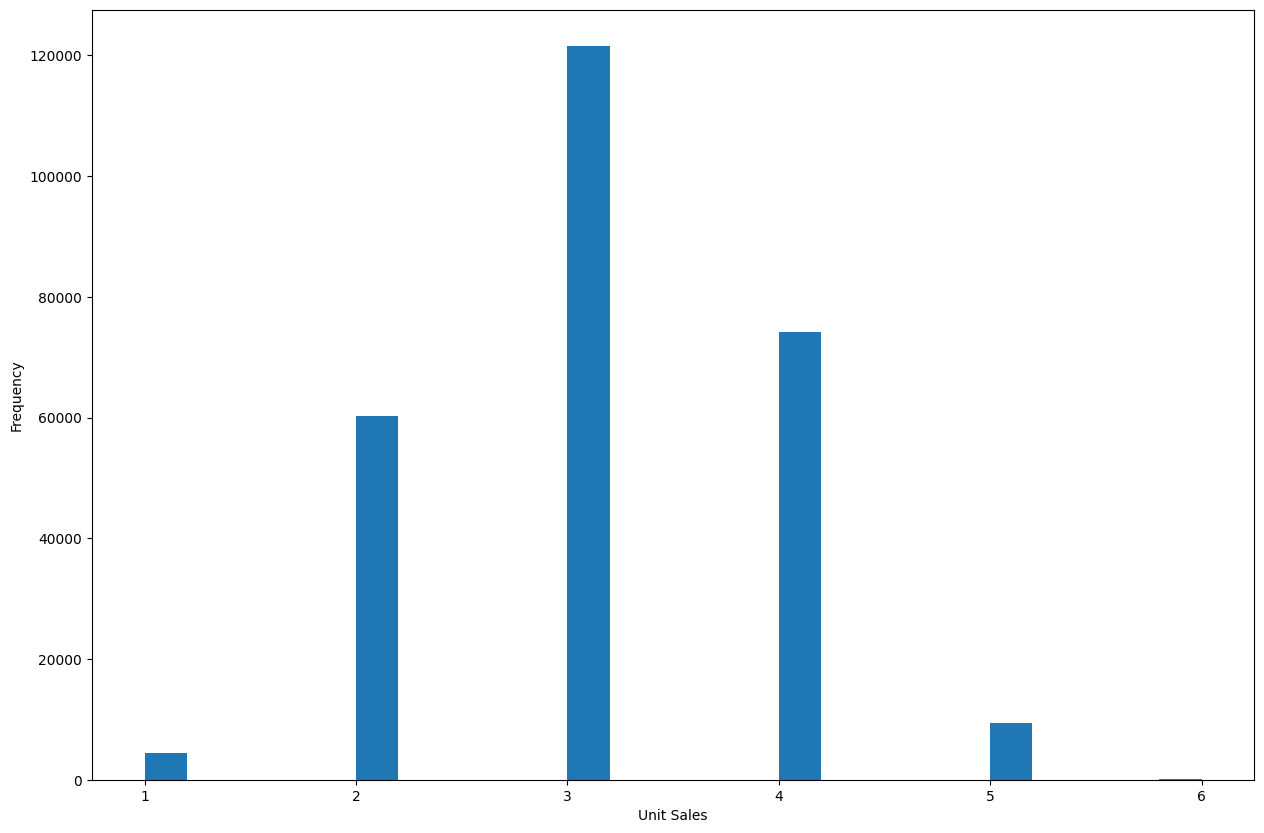

In [71]:
fig = plt.figure(figsize=(15,10))
df['unit_sales'].plot.hist(bins=25)
plt.xlabel('Unit Sales')

#### When do people order
#### Year

([<matplotlib.axis.XTick at 0x2ddb453c5b0>,
 [Text(1996, 0, '1996'),
  Text(1997, 0, '1997'),
  Text(1998, 0, '1998'),
  Text(1999, 0, '1999')])

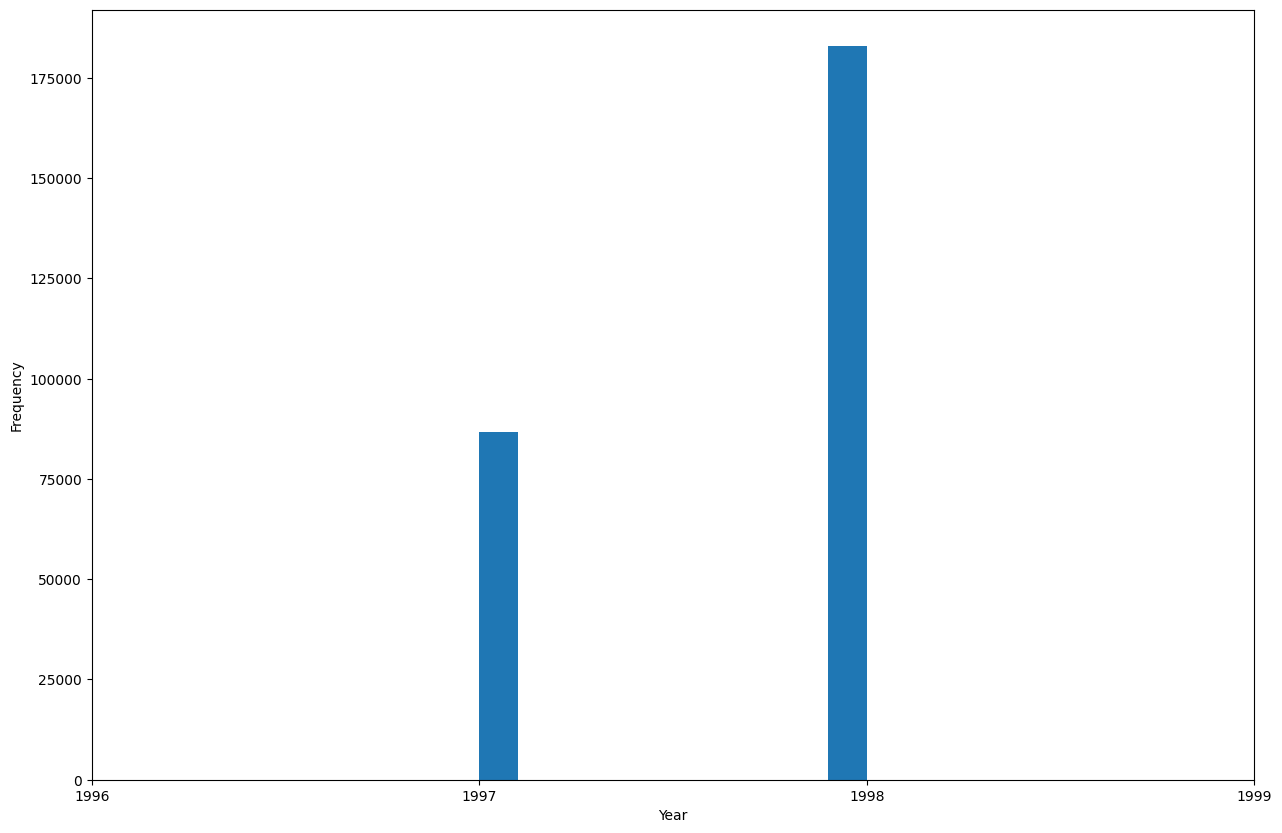

In [72]:
fig = plt.figure(figsize=(15,10))
df['the_year'].plot.hist(bins=10)
plt.xlabel('Year')
plt.xticks([1996,1997,1998,1999])

#### Month

Text(0.5, 0, 'Month')

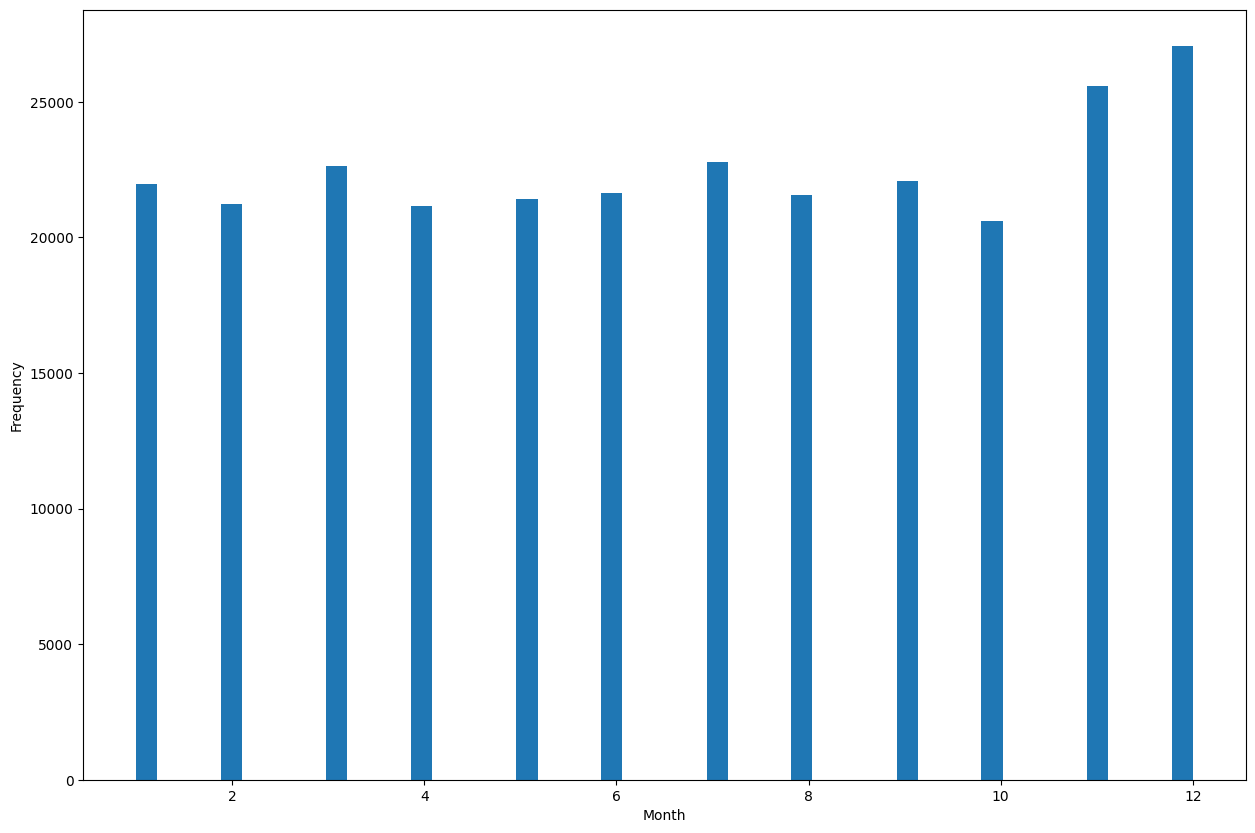

In [74]:
fig = plt.figure(figsize=(15,10))
df['the_month'].plot.hist(bins=50)
plt.xlabel('Month')

#### Day Of Month

Text(0.5, 0, 'Day Of Month')

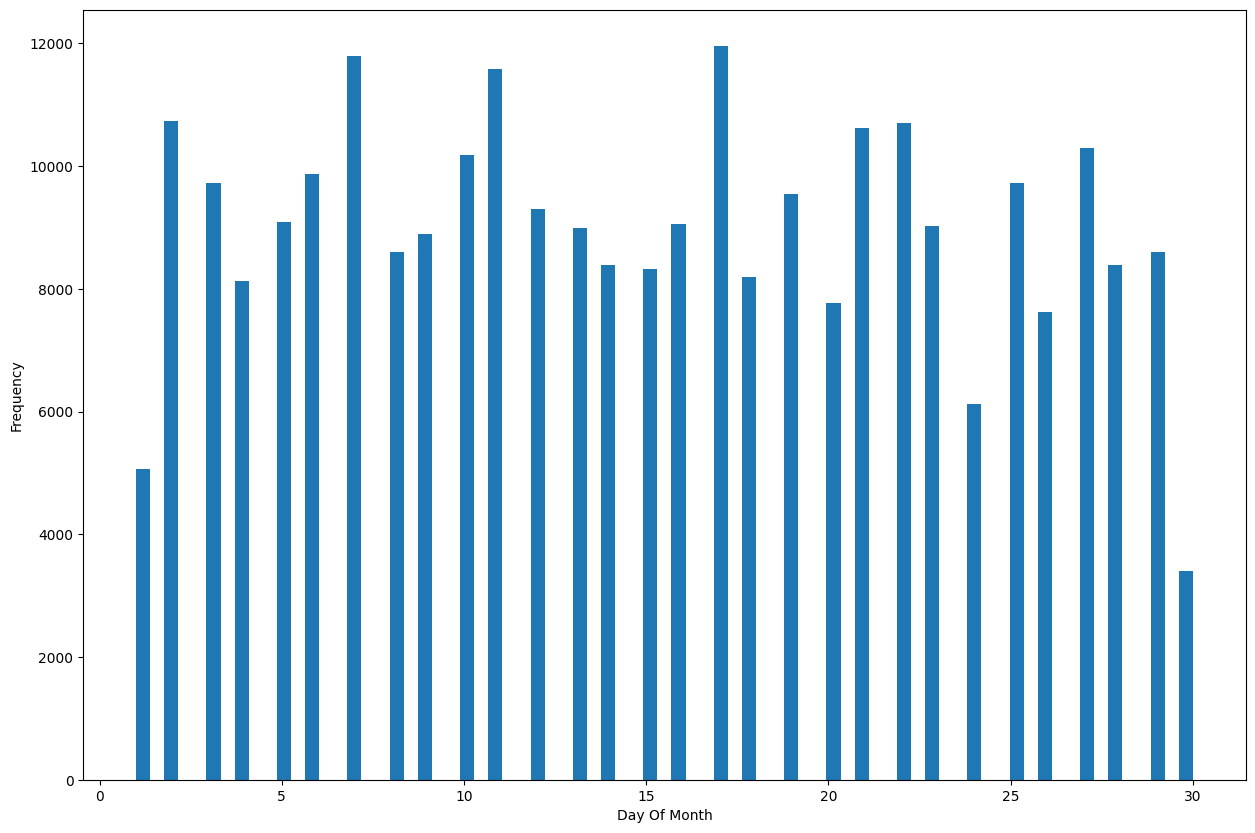

In [75]:
fig = plt.figure(figsize=(15,10))
df['day_of_month'].plot.hist(bins=75)
plt.xlabel('Day Of Month')

#### Day Of Week

<Axes: xlabel='the_day'>

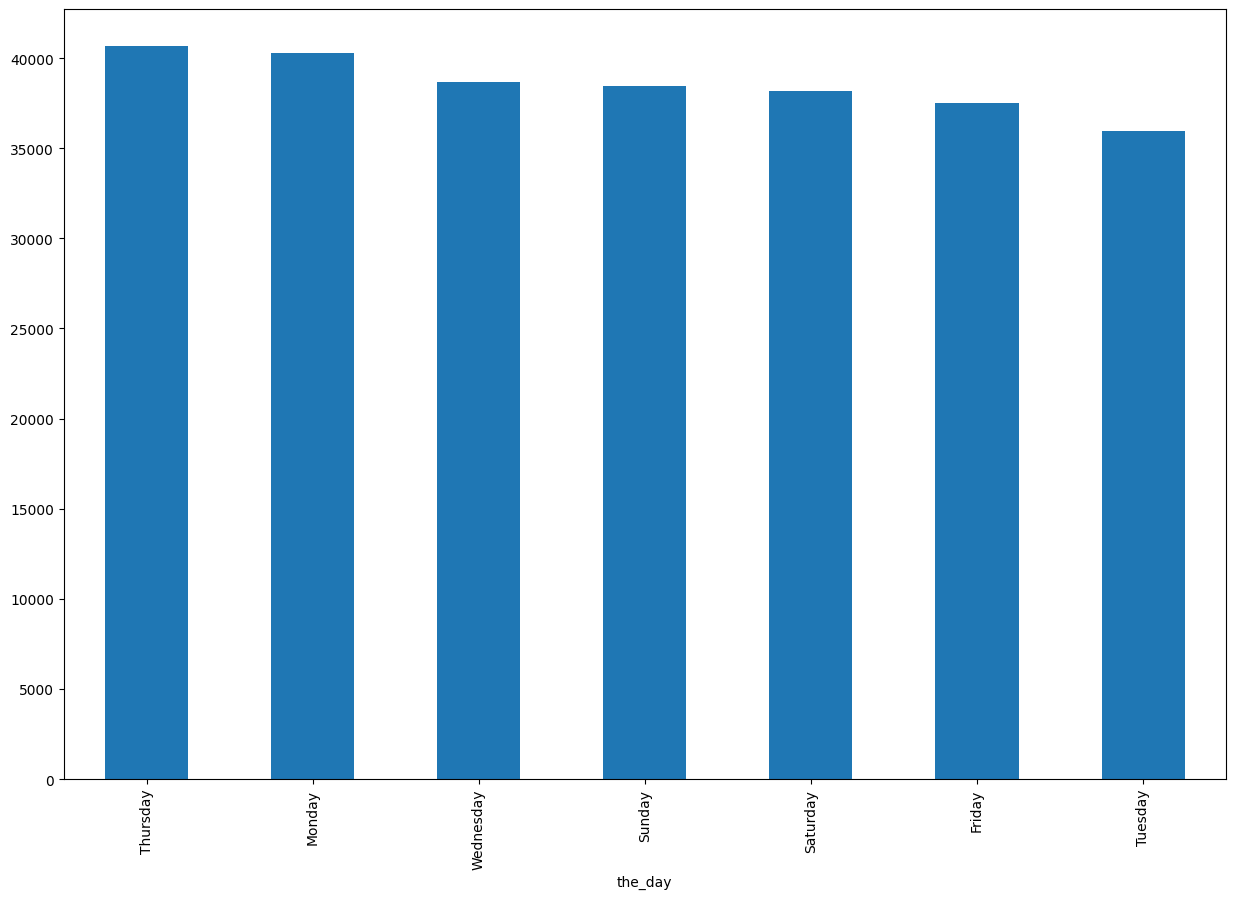

In [76]:
df_day_freq = df['the_day'].value_counts()
fig = plt.figure(figsize=(15,10))
df_day_freq.plot.bar()

#### Top choice
#### Top 10 choices in Products

In [88]:
df['products'] = 'Products'
products = df.truncate(before= 605, after = 615) 
products = nx.from_pandas_edgelist(products, source = 'products', target = 'product_name', edge_attr = True)

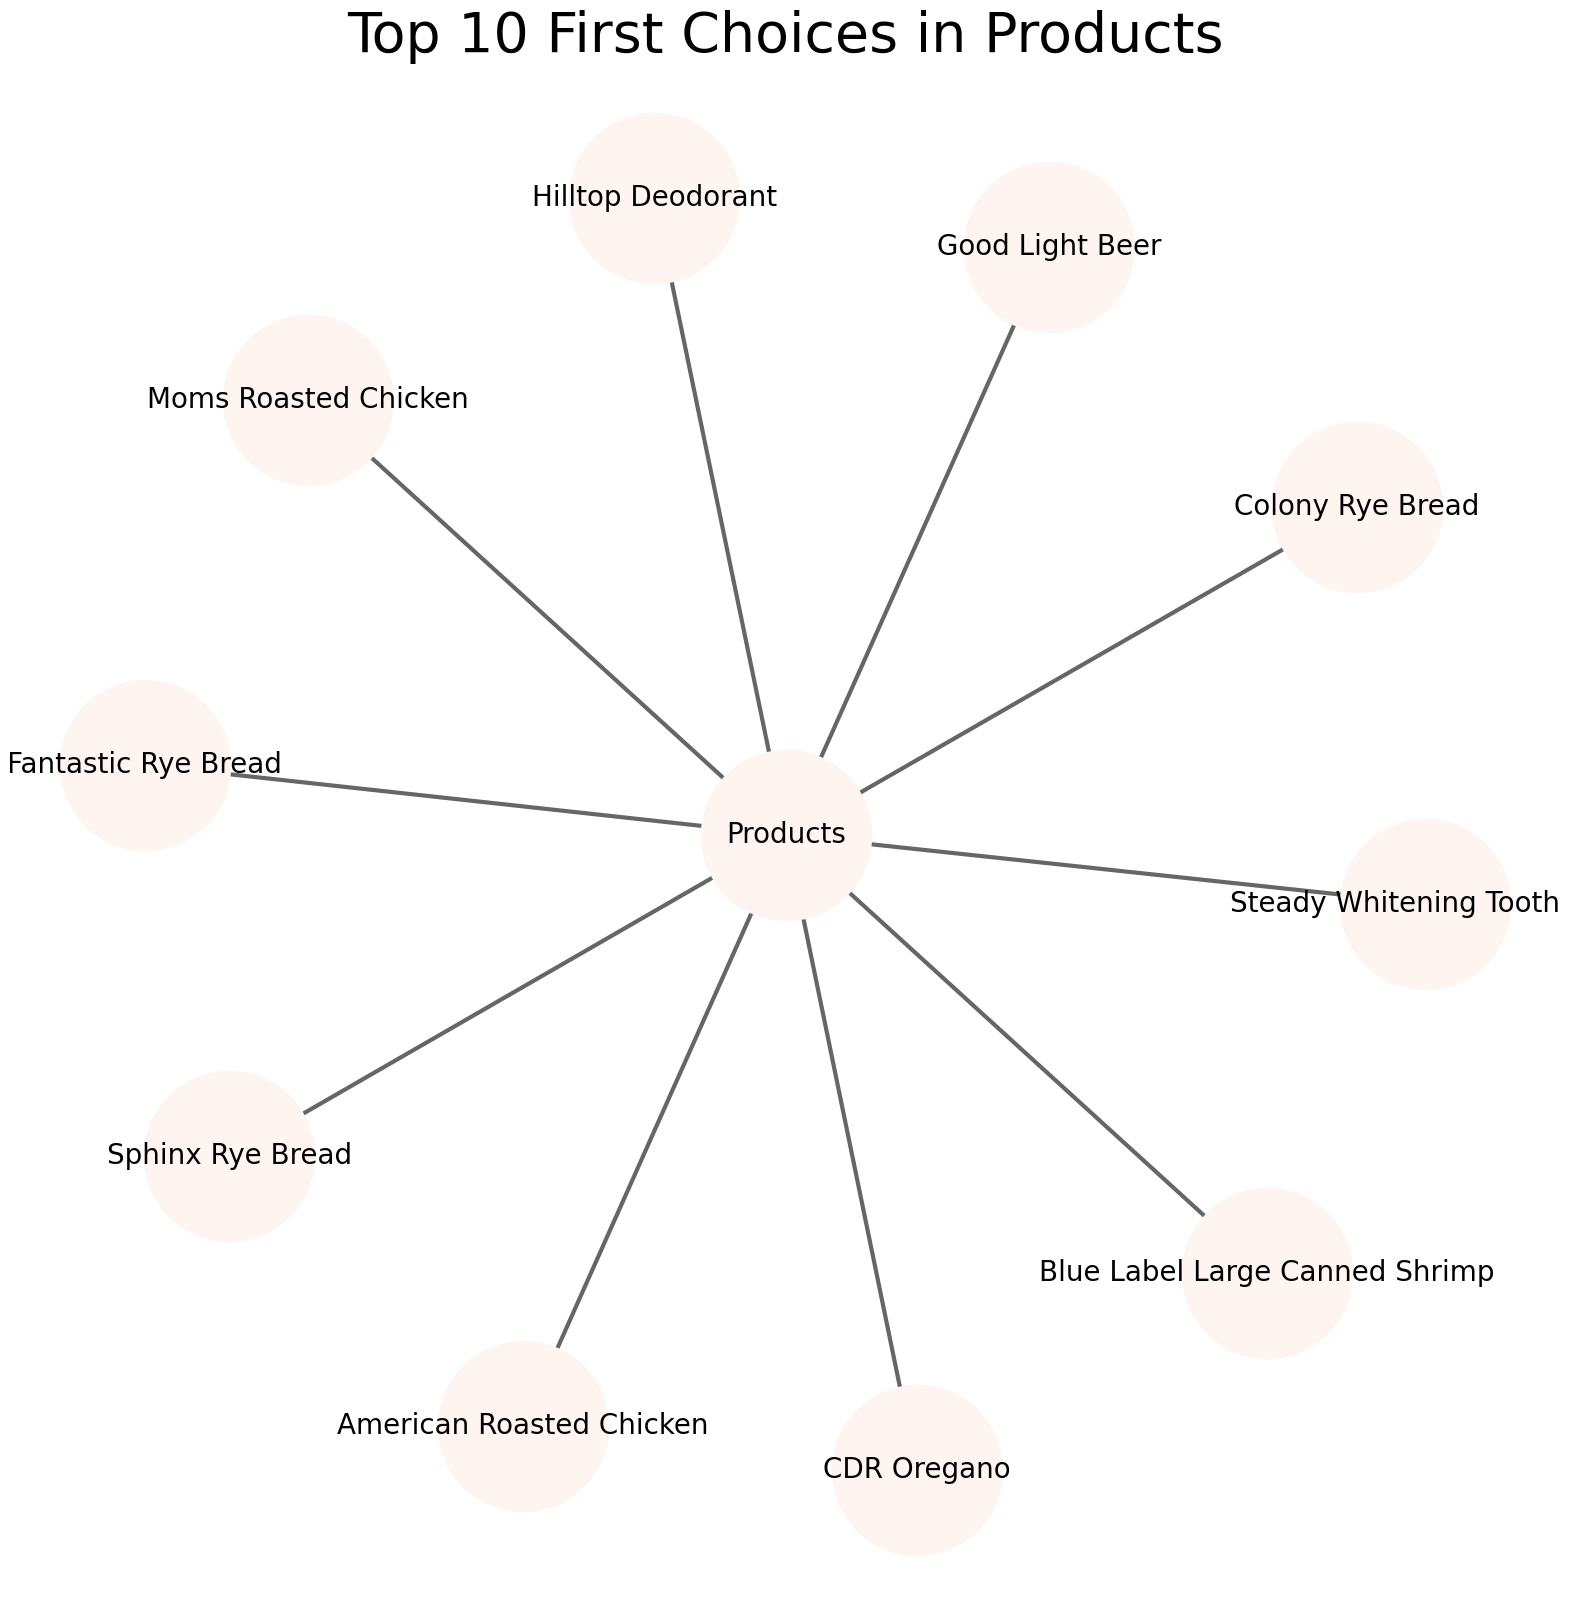

In [89]:
plt.rcParams['figure.figsize'] = (20,20)
pos = nx.spring_layout(products)
color = plt.cm.Reds(np.linspace(0,15,1))
nx.draw_networkx_nodes(products,pos,node_size = 15000, node_color=color)
nx.draw_networkx_edges(products,pos,width = 3, alpha=0.6, edge_color = 'black')
nx.draw_networkx_labels(products,pos,font_size = 20)
plt.axis('off')
plt.grid()
plt.title('Top 10 First Choices in Products', fontsize=40)
plt.show()

#### Top 10 choices in Products_Department

In [93]:
df['departments'] = 'Departments'
departments = df.truncate(before= 150, after = 195) 
departments = nx.from_pandas_edgelist(departments, source = 'departments', target = 'department', edge_attr = True)
departments

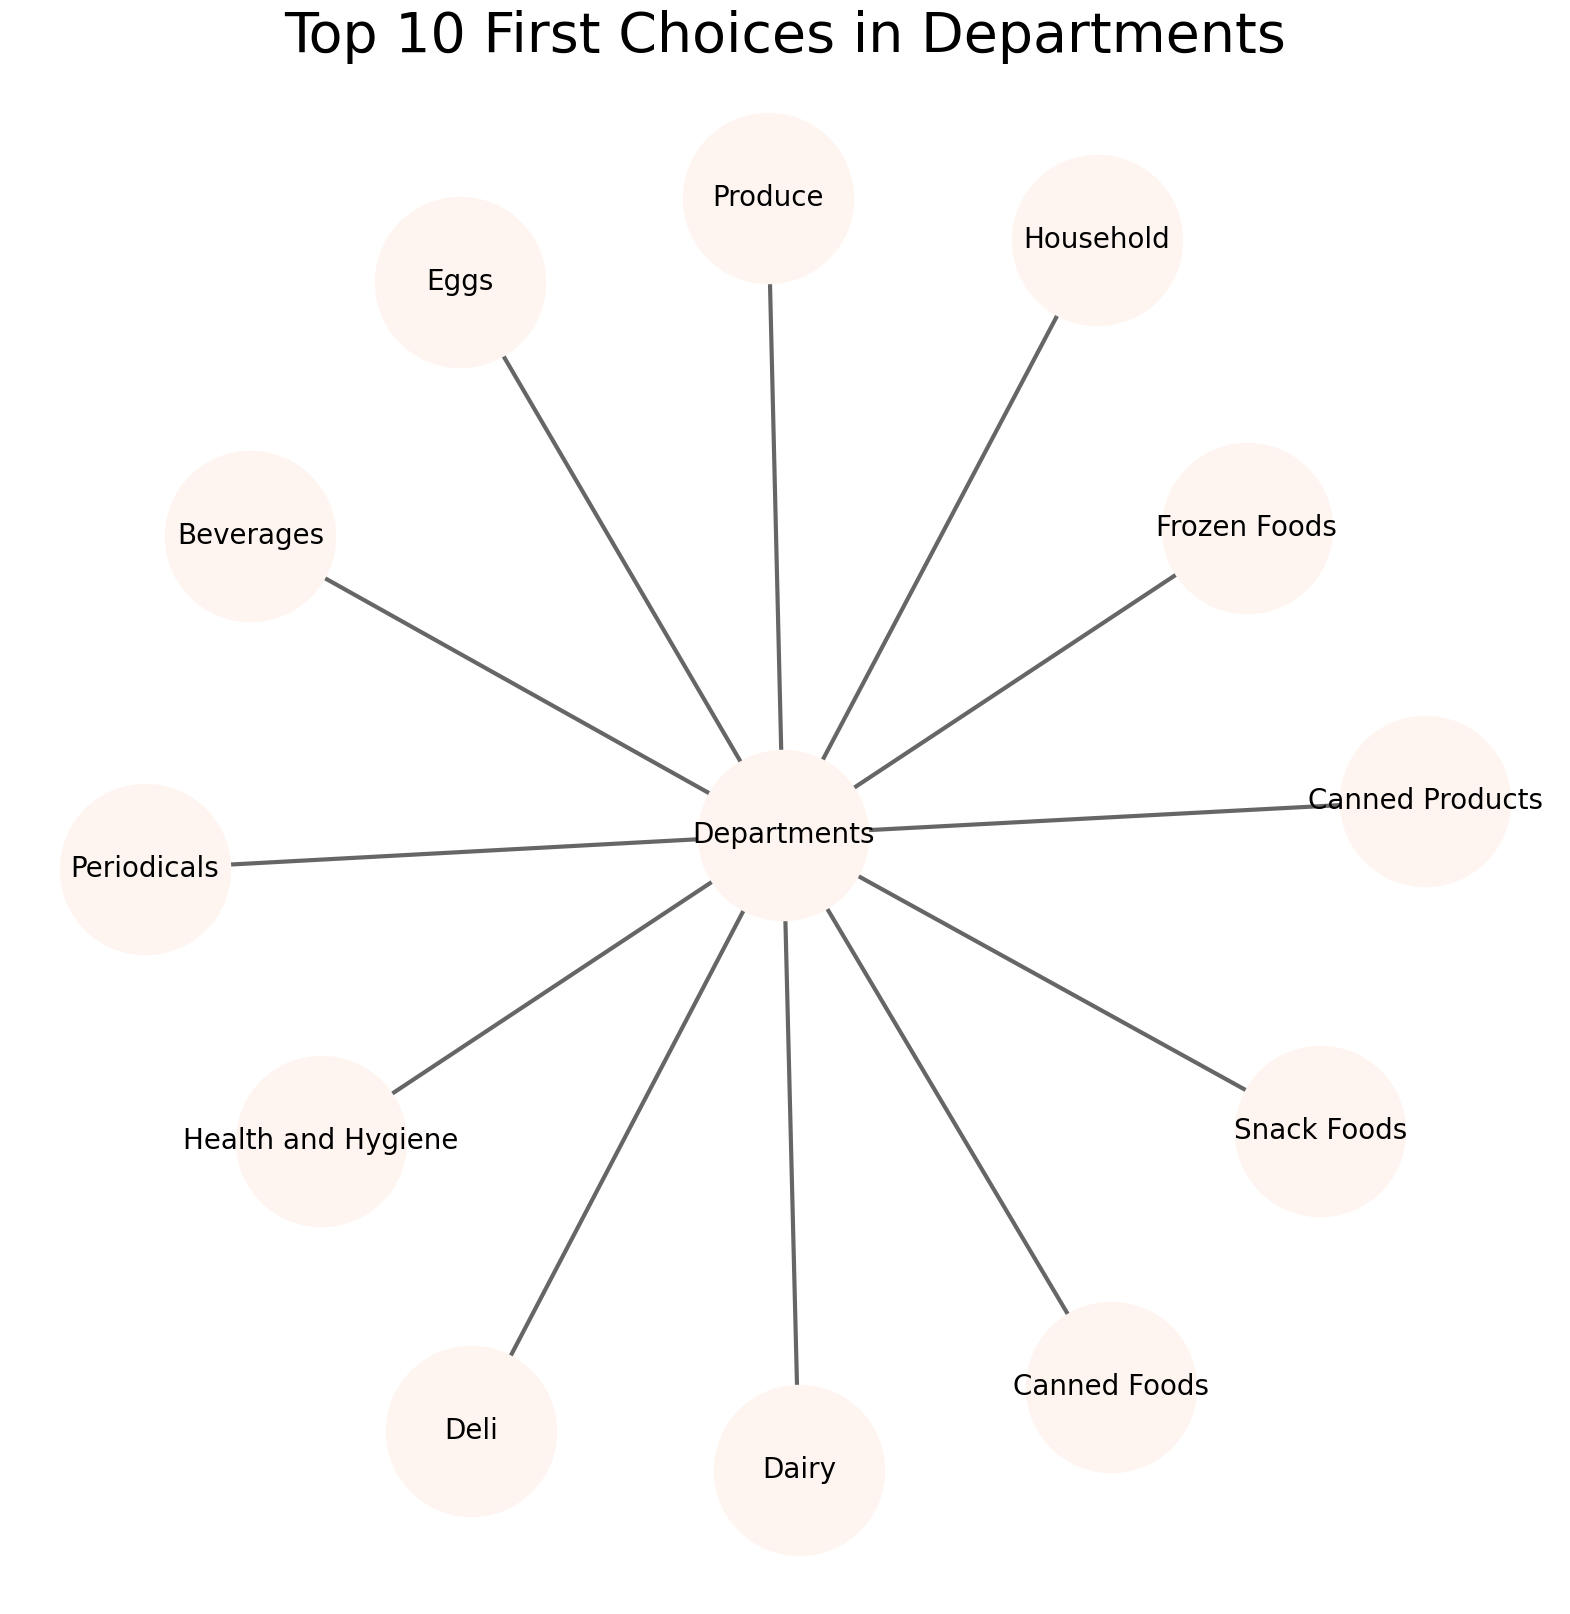

In [94]:
plt.rcParams['figure.figsize'] = (20,20)
pos = nx.spring_layout(departments)
color = plt.cm.Reds(np.linspace(0,15,1))
nx.draw_networkx_nodes(departments,pos,node_size = 15000, node_color=color)
nx.draw_networkx_edges(departments,pos,width = 3, alpha=0.6, edge_color = 'black')
nx.draw_networkx_labels(departments,pos,font_size = 20)
plt.axis('off')
plt.grid()
plt.title('Top 10 First Choices in Departments', fontsize=40)
plt.show()

#### Highest Ordered
#### Most Ordered Products

In [96]:
df['product_name'].value_counts()

product_name
Moms Roasted Chicken                           225
Tell Tale Fresh Lima Beans                     219
Steady Whitening Toothpast                     218
Hilltop Silky Smooth Hair Conditioner          216
Steady Childrens Cold Remedy                   214
Nationeel Dried Apples                         214
Sunset Economy Toilet Brush                    213
Hilltop Mint Mouthwash                         213
Ebony Mixed Nuts                               213
Special Wheat Puffs                            212
Ebony Fresh Lima Beans                         211
BBB Best French Roast Coffee                   208
Hermanos Potatos                               208
Red Wing Glass Cleaner                         208
Better Chicken Noodle Soup                     207
BBB Best Apple Butter                          207
Great Pumpernickel Bread                       207
Big Time Orange Popsicles                      207
Great English Muffins                          207
Hermanos Green Pep

#### Most Ordered Products in Percentage

In [97]:
df['product_name'].value_counts()/len(df)*100

product_name
Moms Roasted Chicken                           0.083420
Tell Tale Fresh Lima Beans                     0.081195
Steady Whitening Toothpast                     0.080825
Hilltop Silky Smooth Hair Conditioner          0.080083
Steady Childrens Cold Remedy                   0.079342
Nationeel Dried Apples                         0.079342
Sunset Economy Toilet Brush                    0.078971
Hilltop Mint Mouthwash                         0.078971
Ebony Mixed Nuts                               0.078971
Special Wheat Puffs                            0.078600
Ebony Fresh Lima Beans                         0.078229
BBB Best French Roast Coffee                   0.077117
Hermanos Potatos                               0.077117
Red Wing Glass Cleaner                         0.077117
Better Chicken Noodle Soup                     0.076746
BBB Best Apple Butter                          0.076746
Great Pumpernickel Bread                       0.076746
Big Time Orange Popsicles          

#### Most Visited Departments

In [98]:
df['department'].value_counts()

department
Produce                38041
Snack Foods            30983
Household              27590
Frozen Foods           27042
Baking Goods           20573
Canned Foods           19090
Dairy                  17195
Health and Hygiene     16643
Beverages              13624
Deli                   12130
Baked Goods             7951
Snacks                  6970
Alcoholic Beverages     6931
Starchy Foods           5198
Periodicals             4318
Eggs                    4099
Breakfast Foods         3462
Canned Products         1779
Meat                    1777
Checkout                1776
Seafood                 1688
Carousel                 860
Name: count, dtype: int64

In [99]:
df['department'].value_counts()/len(df)*100

department
Produce                14.103886
Snack Foods            11.487098
Household              10.229127
Frozen Foods           10.025953
Baking Goods            7.627540
Canned Foods            7.077710
Dairy                   6.375130
Health and Hygiene      6.170473
Beverages               5.051164
Deli                    4.497256
Baked Goods             2.947872
Snacks                  2.584161
Alcoholic Beverages     2.569702
Starchy Foods           1.927184
Periodicals             1.600919
Eggs                    1.519724
Breakfast Foods         1.283553
Canned Products         0.659573
Meat                    0.658831
Checkout                0.658461
Seafood                 0.625834
Carousel                0.318849
Name: count, dtype: float64

#### Most Visited Aisle

In [100]:
df['subcategory'].value_counts()

subcategory
Fresh Vegetables      20859
Fresh Fruit           11972
Soup                   7919
Cheese                 7815
Dried Fruit            7758
Cookies                6930
Wine                   5189
Paper Wipes            5128
Canned Vegetables      5092
Frozen Vegetables      4435
Nuts                   4345
Chocolate Candy        4341
Milk                   4250
Preserves              4237
Chips                  4176
Eggs                   4099
Lightbulbs             3609
Sliced Bread           3586
Muffins                3517
Dips                   3506
Waffles                3501
Pizza                  3481
Cereal                 3462
Cooking Oil            3455
Personal Hygiene       3454
Deli Meats             3435
Batteries              3435
Juice                  3429
Popsicles              3393
Coffee                 3387
Soda                   3367
Pasta                  3148
Ice Cream              2736
Peanut Butter          2660
TV Dinner              2643
Deli Sal

In [101]:
df['subcategory'].value_counts()/len(df)*100

subcategory
Fresh Vegetables      7.733576
Fresh Fruit           4.438677
Soup                  2.936008
Cheese                2.897449
Dried Fruit           2.876316
Cookies               2.569331
Wine                  1.923847
Paper Wipes           1.901231
Canned Vegetables     1.887884
Frozen Vegetables     1.644298
Nuts                  1.610930
Chocolate Candy       1.609447
Milk                  1.575708
Preserves             1.570888
Chips                 1.548272
Eggs                  1.519724
Lightbulbs            1.338054
Sliced Bread          1.329527
Muffins               1.303945
Dips                  1.299867
Waffles               1.298013
Pizza                 1.290598
Cereal                1.283553
Cooking Oil           1.280958
Personal Hygiene      1.280587
Deli Meats            1.273543
Batteries             1.273543
Juice                 1.271318
Popsicles             1.257971
Coffee                1.255747
Soda                  1.248332
Pasta                 1.167

#### Barplot

#### Barplot of Most Visited Aisle

<Axes: xlabel='subcategory'>

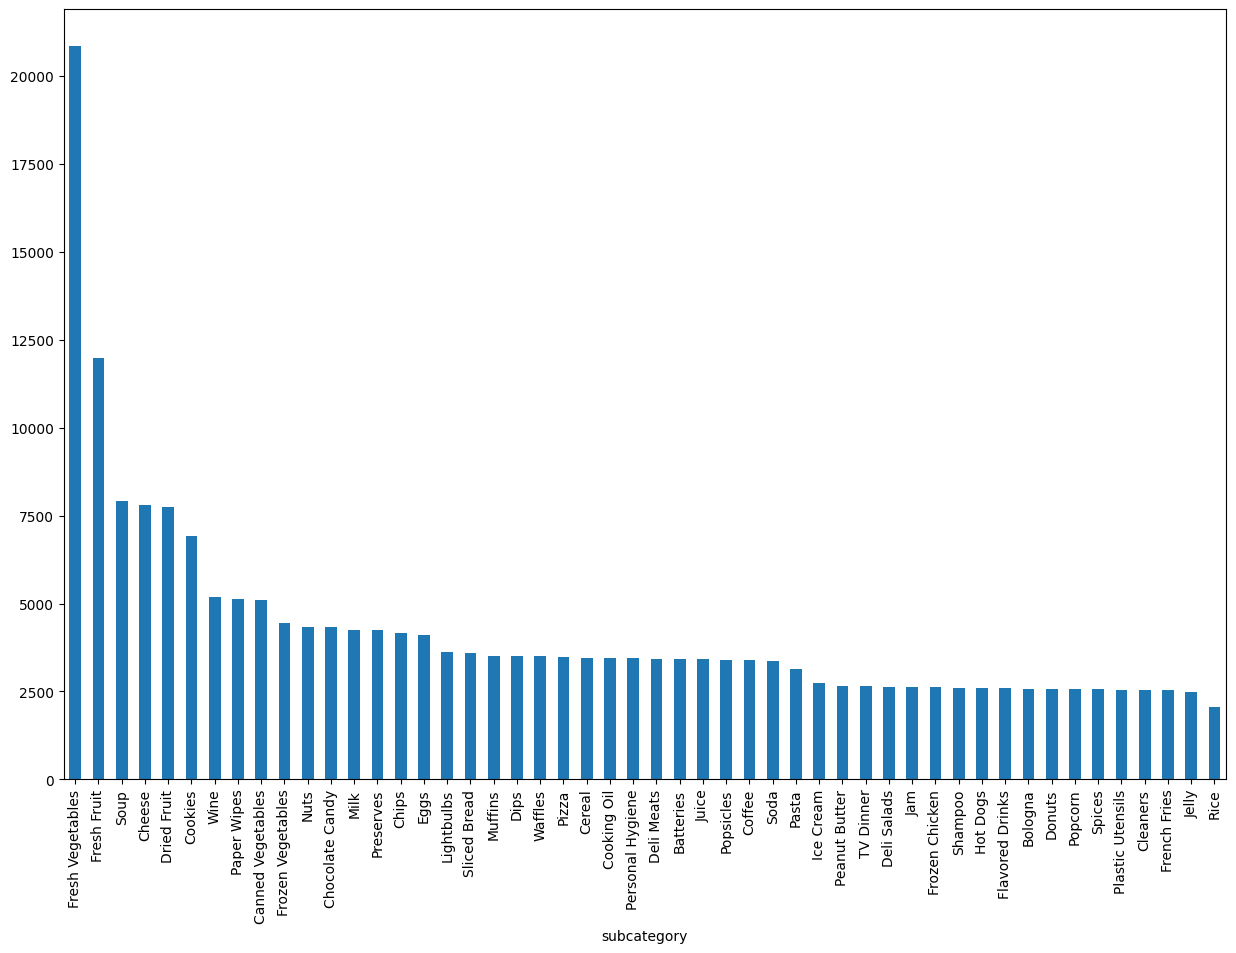

In [102]:
df_subcategory_freq = df['subcategory'].value_counts().iloc[:50]
fig = plt.figure(figsize=(15,10))
df_subcategory_freq.plot.bar()

#### Barplot of Most Visited Departments

<Axes: xlabel='department'>

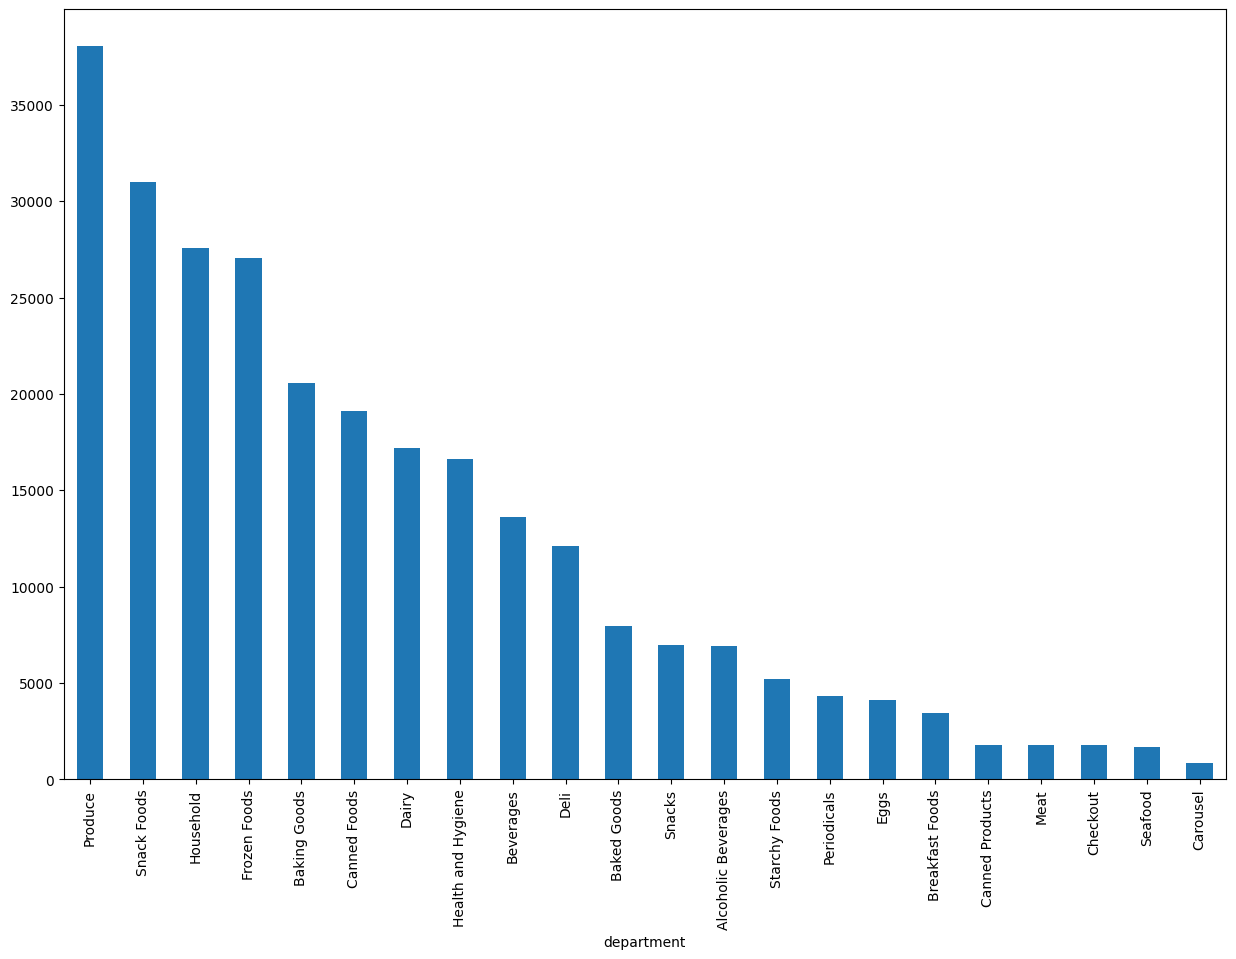

In [104]:
fig = plt.figure(figsize=(15,10))
df['department'].value_counts().plot(kind='bar')

#### Barplot of Most Bought Product

<Axes: xlabel='product_name'>

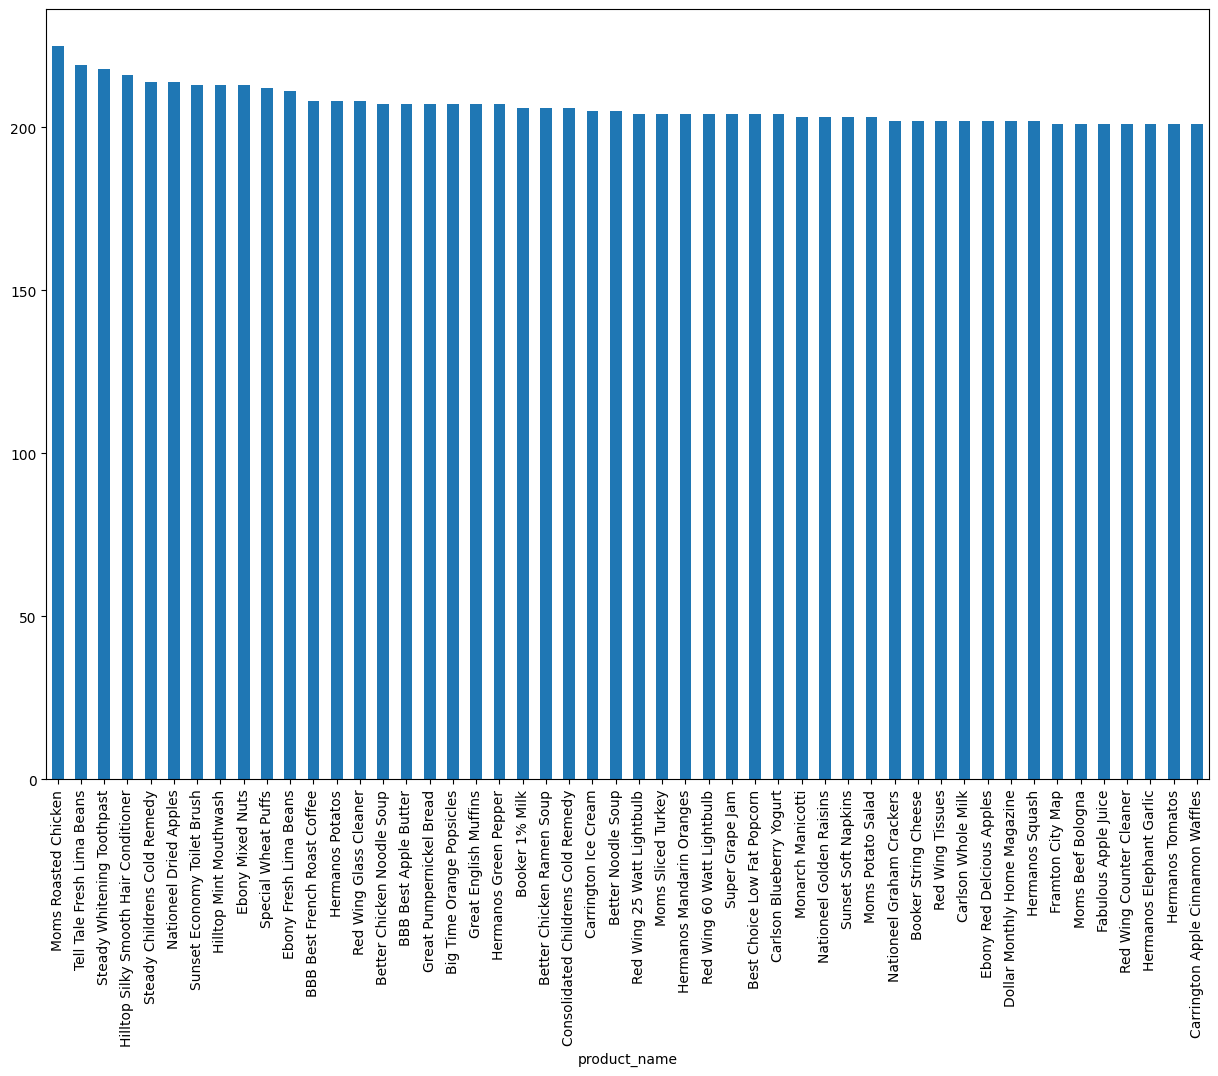

In [105]:
df_product_freq = df['product_name'].value_counts().iloc[:50]
fig = plt.figure(figsize=(15,10))
df_product_freq.plot.bar()

#### Array of Most Bought product

In [107]:
y = df_product_freq.head(50).to_frame()
y.index

Index(['Moms Roasted Chicken', 'Tell Tale Fresh Lima Beans',
       'Steady Whitening Toothpast', 'Hilltop Silky Smooth Hair Conditioner',
       'Steady Childrens Cold Remedy', 'Nationeel Dried Apples',
       'Sunset Economy Toilet Brush', 'Hilltop Mint Mouthwash',
       'Ebony Mixed Nuts', 'Special Wheat Puffs', 'Ebony Fresh Lima Beans',
       'BBB Best French Roast Coffee', 'Hermanos Potatos',
       'Red Wing Glass Cleaner', 'Better Chicken Noodle Soup',
       'BBB Best Apple Butter', 'Great Pumpernickel Bread',
       'Big Time Orange Popsicles', 'Great English Muffins',
       'Hermanos Green Pepper', 'Booker 1% Milk', 'Better Chicken Ramen Soup',
       'Consolidated Childrens Cold Remedy', 'Carrington Ice Cream',
       'Better Noodle Soup', 'Red Wing 25 Watt Lightbulb',
       'Moms Sliced Turkey', 'Hermanos Mandarin Oranges',
       'Red Wing 60 Watt Lightbulb', 'Super Grape Jam',
       'Best Choice Low Fat Popcorn', 'Carlson Blueberry Yogurt',
       'Monarch Manicotti'

#### TreeMap for Most Bought Products

(0.0, 100.0, 0.0, 100.0)

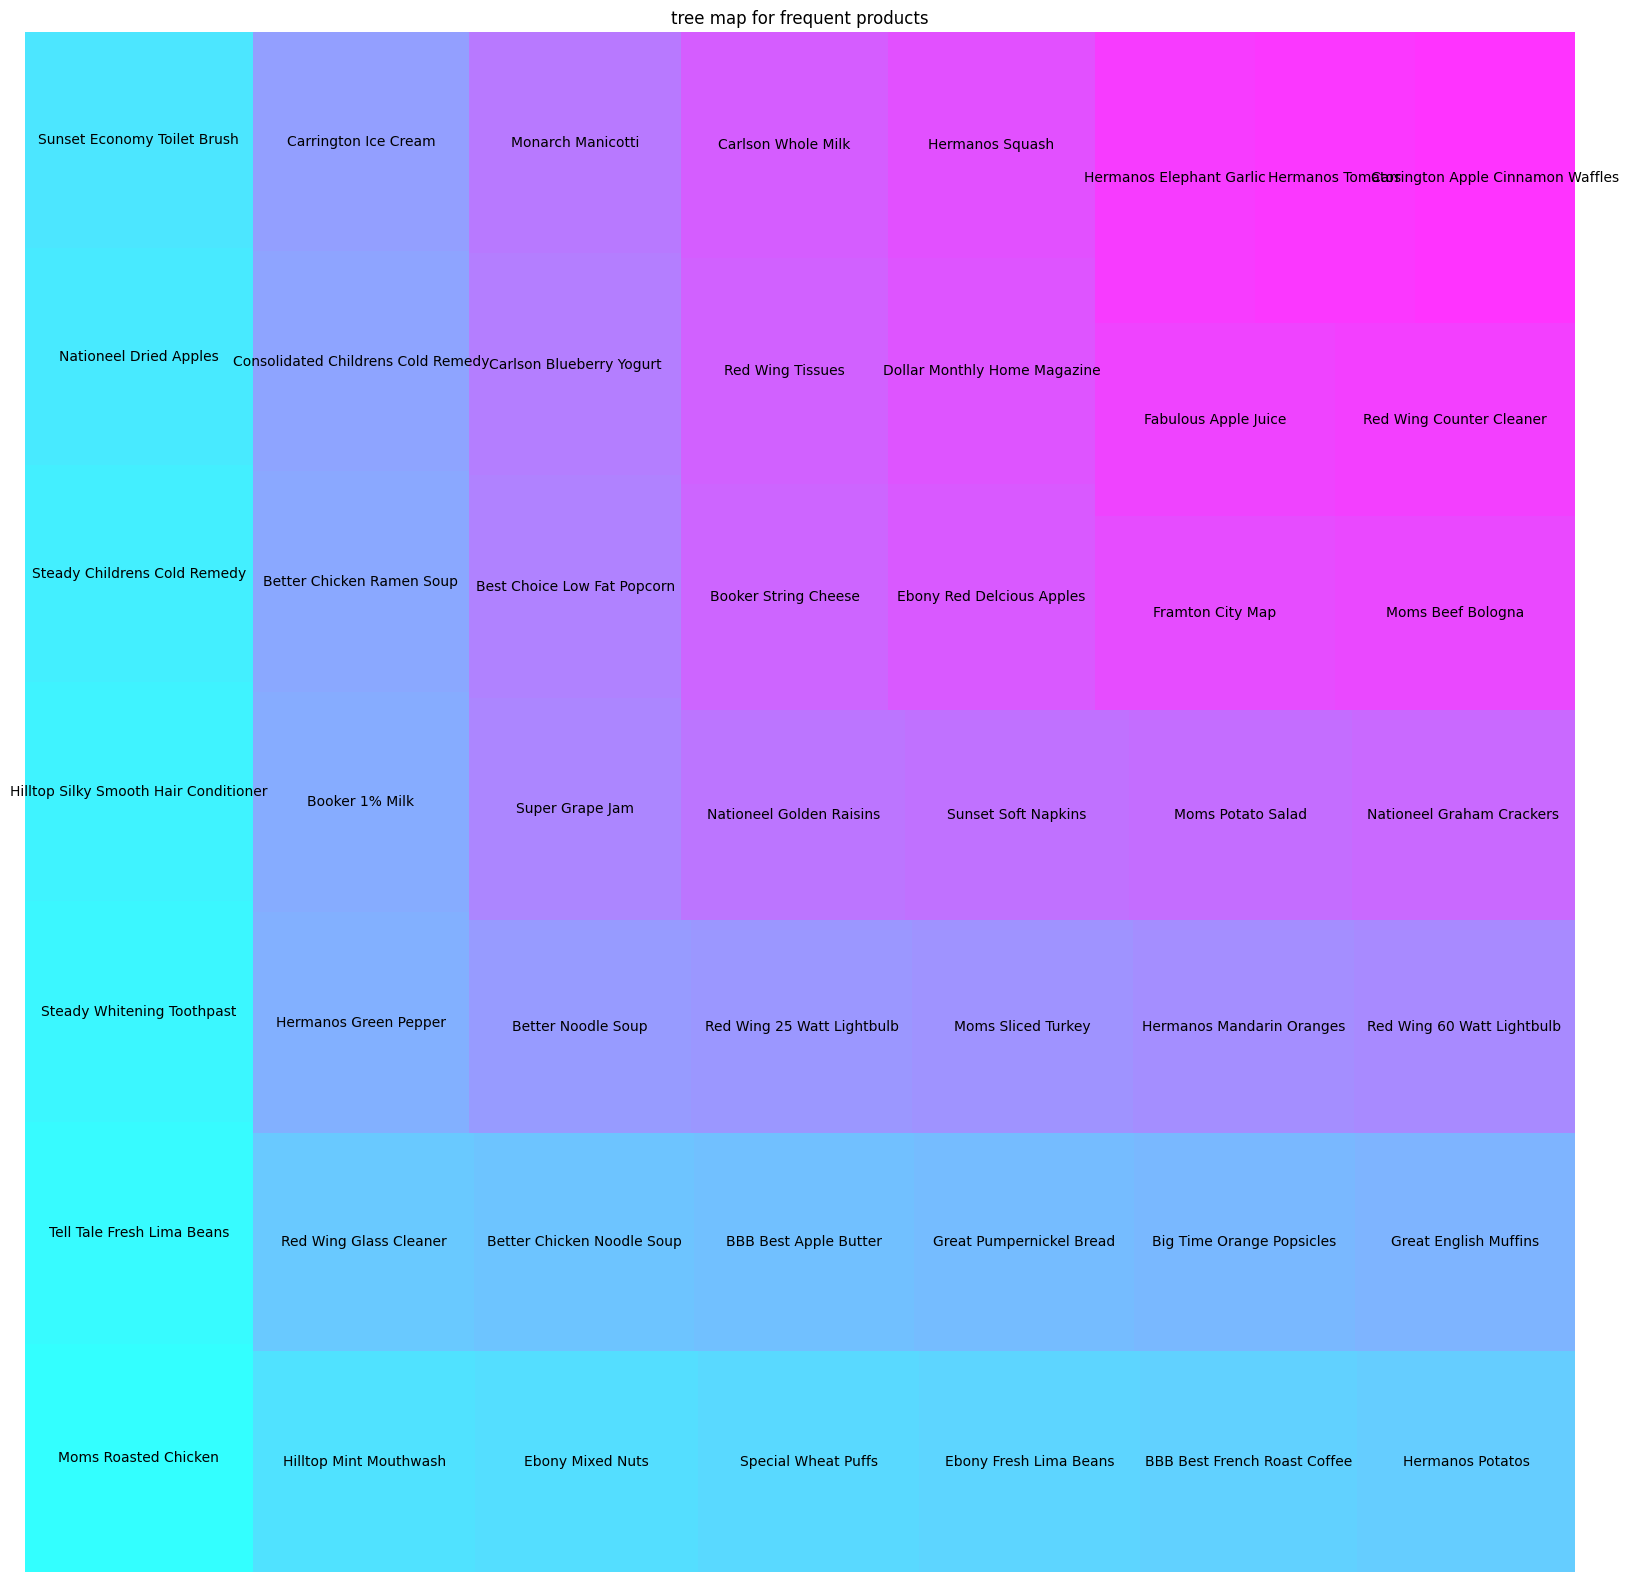

In [109]:
plt.rcParams['figure.figsize'] = (20,20)
color = plt.cm.cool(np.linspace(0,1,50))
squarify.plot(sizes=y.values, label=y.index, alpha=0.8, color=color)
plt.title('tree map for frequent products')
plt.axis('off')

## Data Manipulation

In [111]:
df.shape

(269720, 76)

#### Drop duplicates

In [114]:
df.drop_duplicates()

In [115]:
df.shape

(269720, 76)

#### Missing values

In [116]:
df.isnull().sum()

product_id              0
time_id                 0
customer_id             0
store_id                0
store_sales             0
store_cost              0
unit_sales              0
city                    0
state_province          0
country                 0
customer_region_id      0
yearly_income           0
gender                  0
total_children          0
num_children_at_home    0
education               0
date_accnt_opened       0
member_card             0
occupation              0
houseowner              0
num_cars_owned          0
product_class_id        0
brand_name              0
product_name            0
SKU                     0
SRP                     0
gross_weight            0
net_weight              0
recyclable_package      0
low_fat                 0
units_per_case          0
cases_per_pallet        0
shelf_width             0
shelf_height            0
shelf_depth             0
subcategory             0
category                0
department              0
family      

#### Reading final df

In [7]:
df = pd.read_csv("data/Foodmart_dataset.csv")

In [8]:
df.head()

,Unnamed: 0,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,subcategory,category,department,family,store_type,region_id,store_name,store_number,store_street_address,store_city,store_state,store_postal_code,store_country,store_manager,store_phone,store_fax,first_opened_date,last_remodel_date,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,sales_city,sales_state_province,sales_district,sales_region,sales_country,sales_district_id,the_date,the_day,the_year,the_month,day_of_month,day_since_epoch
0,0,337,371,6280,2,1.50,0.5100,2,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.40,21.6,4.76,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
1,1,963,371,4018,2,2.40,0.7200,1,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,58,Just Right,Just Right Chicken Noodle Soup,22934378981,2.40,20.50,18.50,1,1,6,13,6.68,10.6,9.16,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
2,2,1512,371,6280,2,1.62,0.6318,3,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,5,Jardon,Jardon Spaghetti,53042894005,0.54,13.70,10.60,1,0,28,13,12.80,12.6,9.81,Pasta,Starchy Foods,Starchy Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
3,3,181,371,4018,2,2.79,1.0323,3,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,61,High Top,High Top Lettuce,79397689700,0.93,16.10,14.10,0,1,23,5,16.10,15.1,14.50,Fresh Vegetables,Vegetables,Produce,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
4,4,483,371,4382,2,3.88,1.7072,2,Anacortes,WA,USA,79,$130K - $150K,F,0,0,Graduate Degree,25/07/92,Silver,Management,N,2,61,Tell Tale,Tell Tale Corn on the Cob,80806578993,1.94,13.00,10.00,1,0,3,10,20.80,21.6,5.86,Fresh Vegetables,Vegetables,Produce,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973


In [9]:
len(df)

269720

In [12]:
data_user_orders_num = df.groupby('customer_id')['unit_sales'].count()
data_user_orders_num

customer_id
3         30
5          1
6         16
8         42
9         13
10        31
11         7
12         2
14        14
17         8
18         5
19         5
20        36
21        23
23         9
24        29
25         6
26        15
27         3
28        22
30        23
31         6
32         9
34        18
36        30
38        15
39        54
40         7
41        19
42        33
43        24
44        37
45        31
47         4
48        52
49        17
50        16
52        31
53         2
55        29
56         5
57        29
59        35
60        18
62         8
64        21
66         6
67         3
70         8
71        29
74        23
75        17
76        89
77        28
79        39
80        22
81        21
83        11
84        12
87        23
88        20
89        15
90         4
91        21
93        41
96        20
97        19
98         8
99       102
101       18
102       12
104       91
105       17
106       16
108        1
109        8


In [13]:
source_data = {}
for i in range(10):
    source_data[str(10*i)+'-'+str(10*(i+1))] = len([x for x in list(data_user_orders_num) if x>i*10 and x<(i+1)*10])
source_data

{'0-10': 2145,
 '10-20': 2239,
 '20-30': 1321,
 '30-40': 673,
 '40-50': 379,
 '50-60': 249,
 '60-70': 215,
 '70-80': 157,
 '80-90': 150,
 '90-100': 95}

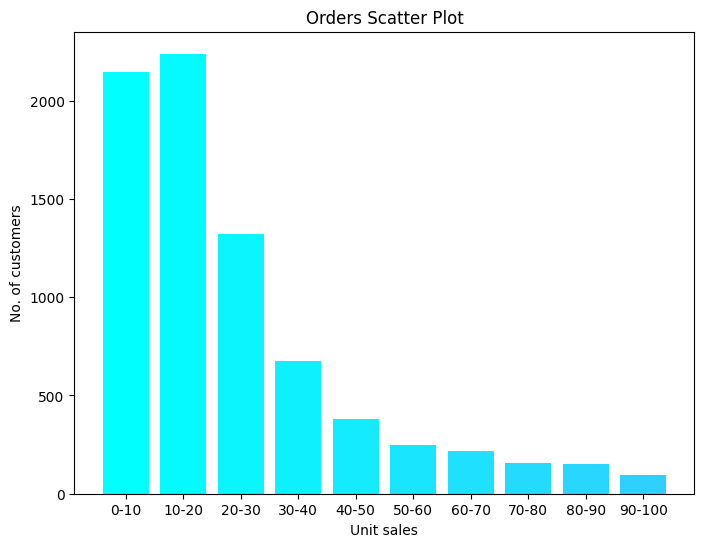

In [16]:
font_size = 10
fig_size = (8,6)
color = plt.cm.cool(np.linspace(0,1,50))
plt.rcParams['figure.figsize'] = fig_size
plt.rcParams['font.size'] = font_size
bar_width = 0.3

x_axis = tuple(source_data.keys())
y_axis = tuple(source_data.values())
#assign color
plt.bar(x_axis,y_axis,color=color)
#description for x-axis, y-axis
plt.xlabel('Unit sales')
plt.ylabel('No. of customers')
plt.title('Orders Scatter Plot')
plt.show()

#### Transaction ID

Create transaction id which denotes a basket

In [17]:
df['transaction_id'] = df['customer_id'].astype(str) + df['time_id'].astype(str)

In [18]:
df.head()

,Unnamed: 0,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,subcategory,category,department,family,store_type,region_id,store_name,store_number,store_street_address,store_city,store_state,store_postal_code,store_country,store_manager,store_phone,store_fax,first_opened_date,last_remodel_date,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,sales_city,sales_state_province,sales_district,sales_region,sales_country,sales_district_id,the_date,the_day,the_year,the_month,day_of_month,day_since_epoch,transaction_id
0,0,337,371,6280,2,1.50,0.5100,2,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.40,21.6,4.76,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973,6280371
1,1,963,371,4018,2,2.40,0.7200,1,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,58,Just Right,Just Right Chicken Noodle Soup,22934378981,2.40,20.50,18.50,1,1,6,13,6.68,10.6,9.16,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973,4018371
2,2,1512,371,6280,2,1.62,0.6318,3,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,5,Jardon,Jardon Spaghetti,53042894005,0.54,13.70,10.60,1,0,28,13,12.80,12.6,9.81,Pasta,Starchy Foods,Starchy Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973,6280371
3,3,181,371,4018,2,2.79,1.0323,3,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,61,High Top,High Top Lettuce,79397689700,0.93,16.10,14.10,0,1,23,5,16.10,15.1,14.50,Fresh Vegetables,Vegetables,Produce,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973,4018371
4,4,483,371,4382,2,3.88,1.7072,2,Anacortes,WA,USA,79,$130K - $150K,F,0,0,Graduate Degree,25/07/92,Silver,Management,N,2,61,Tell Tale,Tell Tale Corn on the Cob,80806578993,1.94,13.00,10.00,1,0,3,10,20.80,21.6,5.86,Fresh Vegetables,Vegetables,Produce,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973,4382371


#### Filtering out Columns

In [24]:
#cols = [76,3,1,24]
order_product = df[['transaction_id','customer_id','product_id','product_name']]
order_product.head()


,transaction_id,customer_id,product_id,product_name
0,6280371,6280,337,Better Turkey Noodle Soup
1,4018371,4018,963,Just Right Chicken Noodle Soup
2,6280371,6280,1512,Jardon Spaghetti
3,4018371,4018,181,High Top Lettuce
4,4382371,4382,483,Tell Tale Corn on the Cob


#### Avearge product bought by customer per order

In [25]:
data_user-products_num1 = order_product.gropby('transaction_id')['product_id'].count()

SyntaxError: cannot assign to expression here. Maybe you meant '==' instead of '='? (3525514582.py, line 1)